In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


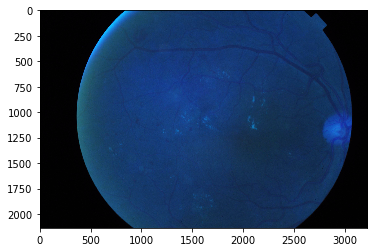

In [3]:
img1 = 'train_images/'+df.id_code[0]+'.png'
img1 = cv2.imread(img1)
plt.imshow(img1)

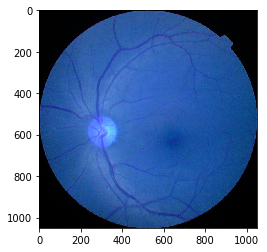

In [4]:
img2 = 'train_images/'+df.id_code[3]+'.png'
img2 = cv2.imread(img2)
plt.imshow(img2)

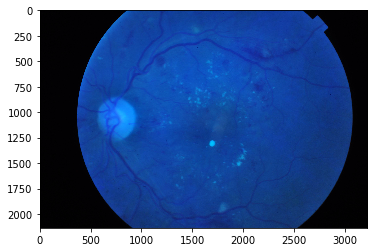

In [5]:
img = 'train_images/'+df.id_code[100]+'.png'
img = cv2.imread(img)
plt.imshow(img)

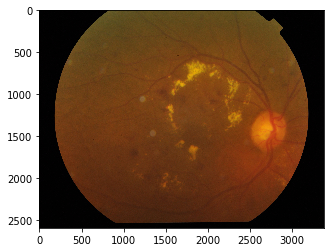

In [6]:
img3 = 'train_images/'+df.id_code[110]+'.png'
img3 = cv2.imread(img3)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)

In [7]:
IMG_SIZE = 512

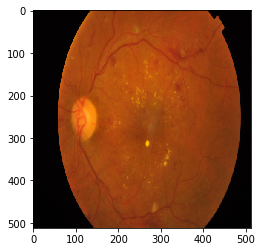

In [8]:
path = 'train_images/'+df.id_code[100]+'.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

plt.imshow(image)

In [9]:
xli = []
for i in range(0,6):
    xvar = random.randint(0, 1500)
    xli.append(xvar)

In [10]:
xli

[1324, 1184, 1297, 5, 659, 316]

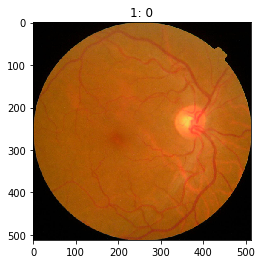

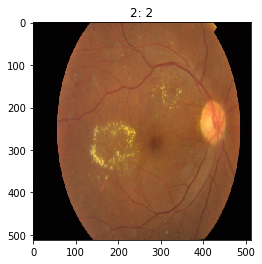

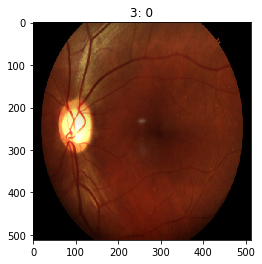

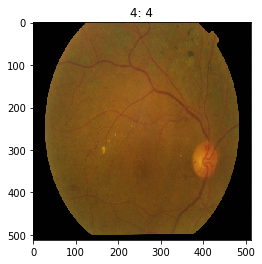

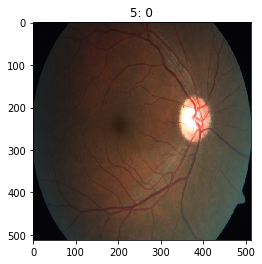

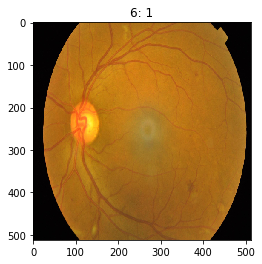

In [11]:
i=1
for x in xli:
    plt.figure()
    path = 'train_images/'+df.id_code[x]+'.png'
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    
    title = df.diagnosis[x]
    plt.title(f'{i}: {title}')
    plt.imshow(image)
    i+=1

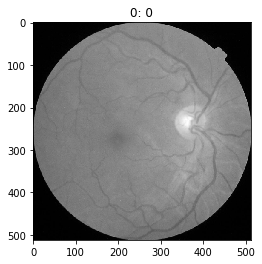

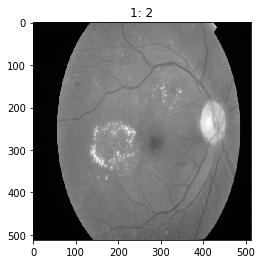

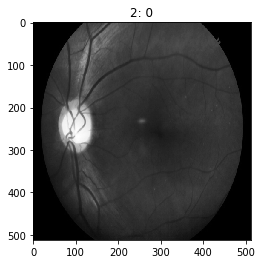

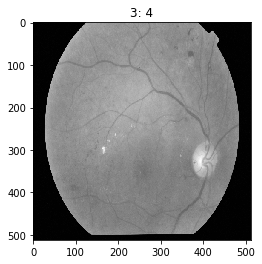

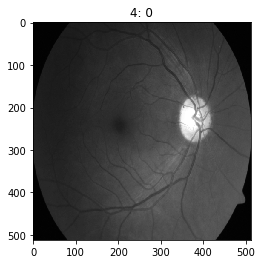

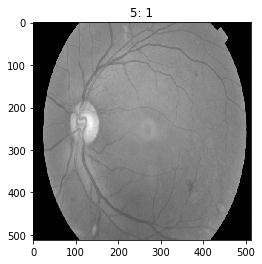

In [12]:
i=0
for x in xli:
    plt.figure()
    path = 'train_images/'+df.id_code[x]+'.png'
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    
    title = df.diagnosis[x]
    plt.title(f'{i}: {title}')
    plt.imshow(image, cmap='gray')
    i+=1

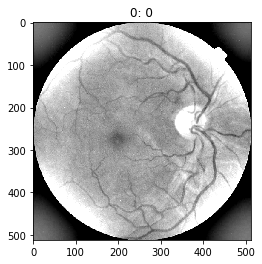

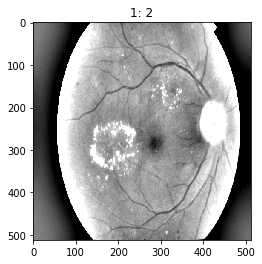

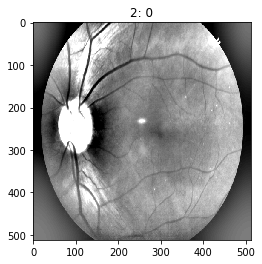

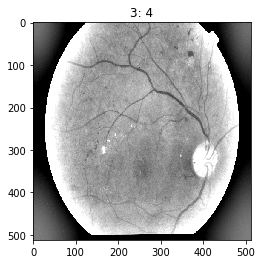

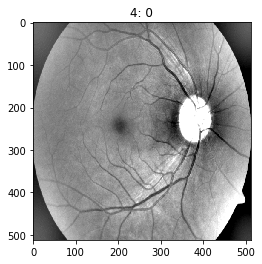

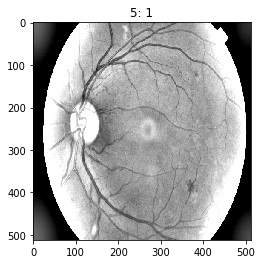

In [13]:
i=0
for x in xli:
    plt.figure()
    path = 'train_images/'+df.id_code[x]+'.png'
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , IMG_SIZE/10) ,-4 ,128) 
    
    title = df.diagnosis[x]
    plt.title(f'{i}: {title}')
    plt.imshow(image, cmap='gray')
    i+=1

In [14]:
xli[1]

1184

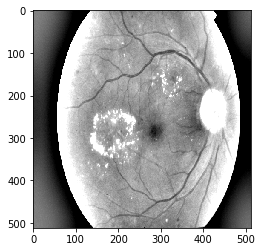

In [15]:
path = 'train_images/'+df.id_code[xli[1]]+'.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , IMG_SIZE/10) ,-4 ,128)

plt.imshow(image, cmap='gray')

In [16]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img



def load_ben_color(path, sigmaX=10):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
        
    return image

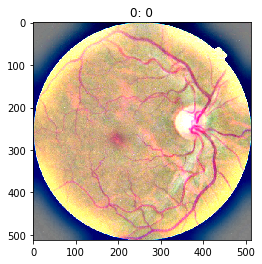

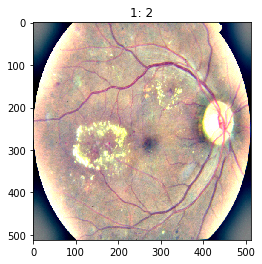

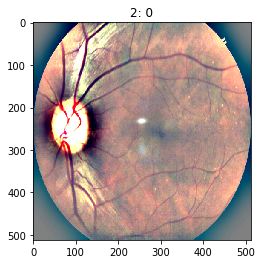

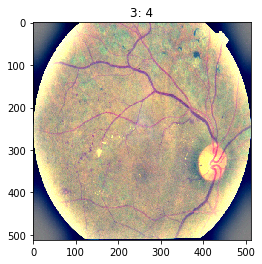

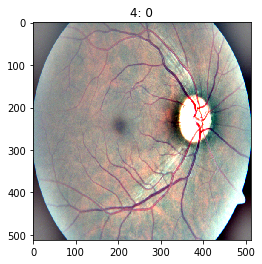

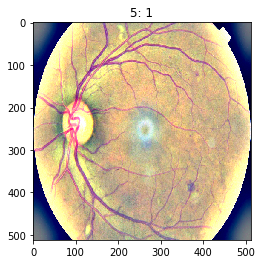

In [17]:
i=0
for x in xli:
    plt.figure()
    path = 'train_images/'+df.id_code[x]+'.png'
    image = load_ben_color(path, sigmaX=30)
    
    title = df.diagnosis[x]
    plt.title(f'{i}: {title}')
    plt.imshow(image, cmap='gray')
    i+=1

In [23]:
df.shape[0]

3662

In [25]:
df.tail()

,id_code,diagnosis
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0
3661,ffec9a18a3ce,2


In [27]:
i=0
for x in range(0,df.shape[0]):
#     plt.figure()
    path = 'train_images/'+df.id_code[x]+'.png'
    image = load_ben_color(path, sigmaX=30)
    
#     title = df.diagnosis[x]
#     plt.title(f'{i}: {title}')
#     plt.imshow(image, cmap='gray')
    cv2.imwrite(f'cropped/{df.id_code[x]}.png', image)
    i+=1
print(f'{i} no of images are saved')

3662 no of images are saved


In [3]:
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [5]:
df.shape[0]

3662

In [10]:
level = []

for i in range(0, df.shape[0]):
    if df.diagnosis[i]==0:
        level.append(0)
    else:
        level.append(1)

In [12]:
df['level'] = level

In [13]:
df.head()

,id_code,diagnosis,level
0,000c1434d8d7,2,1
1,001639a390f0,4,1
2,0024cdab0c1e,1,1
3,002c21358ce6,0,0
4,005b95c28852,0,0


In [24]:
(df[(df.diagnosis==0) & (df.level==0)].shape[0] + df[(df.diagnosis!=0) & (df.level!=0)].shape[0]) == df.shape[0]

True

In [22]:
1805 + 1857

3662

In [28]:
df.drop('diagnosis', axis=1, inplace=True)

In [29]:
df.head()

,id_code,level
0,000c1434d8d7,1
1,001639a390f0,1
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [32]:
df.to_csv('new_train.csv', index=False)

In [35]:
pd.read_csv('new_train.csv').head()

,id_code,level
0,000c1434d8d7,1
1,001639a390f0,1
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
